In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
import math
from sklearn.externals.six import StringIO 
import pydot
from sklearn import tree
from sklearn.svm import SVC
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

%matplotlib inline
train_data = pd.read_csv("../Data/CE802_P2_Data.csv",sep=',')
test_data = pd.read_csv("../Data/CE802_P2_Test.csv",sep=',')
result_file="Results/CE802_P2_Test.csv"



C:\Conda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)

Bad key "text.kerning_factor" on line 4 in
C:\Conda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-471.81,-1.14,20,7.45,1.98,-0.18,-9.18,-38.61,-28.14,-12.90,60,-189.87,8.45,4.85,9.24,False
1,-546.81,-8.52,20,6.40,4.24,3.42,-11.31,-46.26,-48.14,-11.28,350,-44.87,7.20,2.91,10.32,False
2,-486.81,-6.66,20,10.15,-1.22,3.34,-14.01,-39.81,-48.14,-12.14,190,-124.87,8.55,6.31,11.25,True
3,-282.81,8.37,2,0.38,3.58,-16.24,2.19,-22.26,-22.14,-22.32,10,-34.87,1.43,8.50,10.15,False
4,-336.81,-2.16,20,8.45,-1.18,2.94,-11.10,-37.11,-28.14,-15.84,105,-124.87,6.45,4.17,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-366.81,4.20,20,6.40,1.92,1.16,-4.98,-39.81,-48.14,-14.44,335,-209.87,9.05,6.70,9.00,False
1496,-186.81,2.94,20,5.35,-0.84,-10.00,-6.51,-37.11,-48.14,-18.18,95,-39.87,10.45,4.86,9.31,False
1497,-240.81,7.92,2,0.54,1.88,-7.66,0.78,-23.31,-22.14,-20.54,17,-42.87,0.10,8.92,NaN,False
1498,-258.81,8.31,2,0.59,-0.80,-6.64,1.95,-21.57,-26.14,-22.94,15,-41.87,1.68,9.11,10.92,False


In [3]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,NaN,NaN
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.64,NaN
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.84,NaN
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.13,NaN
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-321.81,-7.17,20,7.25,2.14,4.84,-13.05,-44.31,-28.14,-10.76,360,-34.87,7.90,3.36,11.22,NaN
1496,-306.81,-5.28,20,7.10,0.22,2.70,-10.38,-39.81,-28.14,-16.82,295,-64.87,14.05,3.45,NaN,NaN
1497,-270.81,8.10,2,0.88,2.58,-7.40,3.87,-21.48,-26.14,-20.74,20,-33.87,1.29,8.97,9.61,NaN
1498,-516.81,-2.88,20,7.60,-0.02,0.88,-7.98,-37.71,-48.14,-21.10,130,-219.87,6.65,4.86,NaN,NaN


In [4]:
def clean_data(data):
    for i in range(1,data.shape[1]):
#         false_mean=data[data["Class"]== False]["F"+str(i)].mean()
#         true_mean=data[data["Class"]== True]["F"+str(i)].mean()
        col_mean=data["F"+str(i)].mean()
        data['F'+str(i)] = data['F'+str(i)].replace(np.nan, col_mean)
    return data
    

In [5]:
train_data = clean_data(train_data)
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-471.81,-1.14,20,7.45,1.98,-0.18,-9.18,-38.61,-28.14,-12.90,60,-189.87,8.45,4.85,9.240000,False
1,-546.81,-8.52,20,6.40,4.24,3.42,-11.31,-46.26,-48.14,-11.28,350,-44.87,7.20,2.91,10.320000,False
2,-486.81,-6.66,20,10.15,-1.22,3.34,-14.01,-39.81,-48.14,-12.14,190,-124.87,8.55,6.31,11.250000,True
3,-282.81,8.37,2,0.38,3.58,-16.24,2.19,-22.26,-22.14,-22.32,10,-34.87,1.43,8.50,10.150000,False
4,-336.81,-2.16,20,8.45,-1.18,2.94,-11.10,-37.11,-28.14,-15.84,105,-124.87,6.45,4.17,10.743013,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-366.81,4.20,20,6.40,1.92,1.16,-4.98,-39.81,-48.14,-14.44,335,-209.87,9.05,6.70,9.000000,False
1496,-186.81,2.94,20,5.35,-0.84,-10.00,-6.51,-37.11,-48.14,-18.18,95,-39.87,10.45,4.86,9.310000,False
1497,-240.81,7.92,2,0.54,1.88,-7.66,0.78,-23.31,-22.14,-20.54,17,-42.87,0.10,8.92,10.743013,False
1498,-258.81,8.31,2,0.59,-0.80,-6.64,1.95,-21.57,-26.14,-22.94,15,-41.87,1.68,9.11,10.920000,False


In [6]:
test_data = clean_data(test_data)
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,10.776347,NaN
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.640000,NaN
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.840000,NaN
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.130000,NaN
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,10.776347,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-321.81,-7.17,20,7.25,2.14,4.84,-13.05,-44.31,-28.14,-10.76,360,-34.87,7.90,3.36,11.220000,NaN
1496,-306.81,-5.28,20,7.10,0.22,2.70,-10.38,-39.81,-28.14,-16.82,295,-64.87,14.05,3.45,10.776347,NaN
1497,-270.81,8.10,2,0.88,2.58,-7.40,3.87,-21.48,-26.14,-20.74,20,-33.87,1.29,8.97,9.610000,NaN
1498,-516.81,-2.88,20,7.60,-0.02,0.88,-7.98,-37.71,-48.14,-21.10,130,-219.87,6.65,4.86,10.776347,NaN


In [7]:
X = train_data.drop('Class', axis=1)
columns=X.columns
y = train_data['Class']
X_test=test_data.drop('Class',axis=1)

In [8]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_test=scaler.fit_transform(X_test)

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.20)

In [10]:
knn = KNeighborsClassifier(n_neighbors=15,metric='manhattan')
rbf = SVC(kernel='rbf', C=1e2, gamma=0.03)
lin = SVC(kernel='linear')
dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=None)


In [11]:
knn.fit(X_train, y_train)
rbf.fit(X_train, y_train)
lin.fit(X_train, y_train)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
cv_acc_knn = round(cross_val_score(knn, X_train, y_train, cv = 5, scoring='accuracy').mean(),3)
cv_acc_rbf = round(cross_val_score(rbf, X_train, y_train, cv = 5, scoring='accuracy').mean(),3)
cv_acc_lin = round(cross_val_score(lin, X_train, y_train, cv = 5, scoring='accuracy').mean(),3)
cv_acc_dtc = round(cross_val_score(dtc, X_train, y_train, cv = 5, scoring='accuracy').mean(),3)

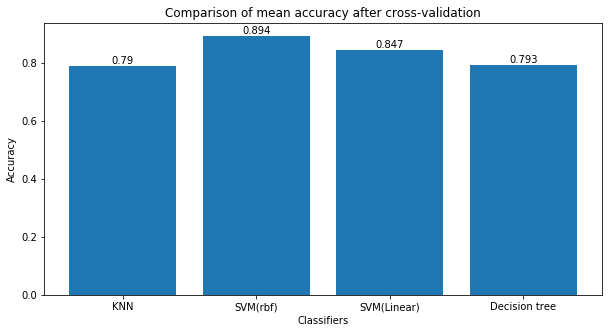

In [13]:
names = ['KNN','SVM(rbf)','SVM(Linear)','Decision tree']
values = [cv_acc_knn, cv_acc_rbf ,cv_acc_lin, cv_acc_dtc]
fig = plt.figure(figsize = (10, 5))
# creating the bar plot 
plt.bar(names, values) 
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(names[i],values[i]), ha='center', va='bottom')  
plt.xlabel("Classifiers") 
plt.ylabel("Accuracy") 
plt.title("Comparison of mean accuracy after cross-validation") 
plt.show() 

In [14]:
y_predict_knn = knn.predict(X_valid)
y_predict_rbf = rbf.predict(X_valid)
y_predict_lin = lin.predict(X_valid)
y_predict_dtc = dtc.predict(X_valid)

In [15]:
knn_acc = round(accuracy_score(y_valid, y_predict_knn),3)
rbf_acc = round(accuracy_score(y_valid, y_predict_rbf),3)
lin_acc = round(accuracy_score(y_valid, y_predict_lin),3)
dtc_acc = round(accuracy_score(y_valid, y_predict_dtc),3)

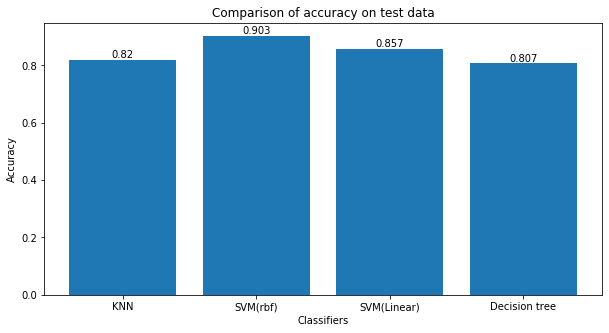

In [16]:
values = [knn_acc, rbf_acc, lin_acc, dtc_acc]
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(names, values) 
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(names[i],values[i]), ha='center', va='bottom')    
plt.xlabel("Classifiers") 
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracy on test data") 
plt.show() 

In [17]:
print("KNN")
print(confusion_matrix(y_valid,y_predict_knn))
print(classification_report(y_valid,y_predict_knn))
print()
print("SVM classifier with rbf")
print(confusion_matrix(y_valid,y_predict_rbf))
print(classification_report(y_valid,y_predict_rbf))
print()
print("SVM classifier with linear function")
print(confusion_matrix(y_valid,y_predict_lin))
print(classification_report(y_valid,y_predict_lin))
print()
print("decision tree classifier")
print(confusion_matrix(y_valid,y_predict_dtc))
print(classification_report(y_valid,y_predict_dtc))

KNN
[[150  17]
 [ 37  96]]
              precision    recall  f1-score   support

       False       0.80      0.90      0.85       167
        True       0.85      0.72      0.78       133

    accuracy                           0.82       300
   macro avg       0.83      0.81      0.81       300
weighted avg       0.82      0.82      0.82       300


SVM classifier with rbf
[[153  14]
 [ 15 118]]
              precision    recall  f1-score   support

       False       0.91      0.92      0.91       167
        True       0.89      0.89      0.89       133

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


SVM classifier with linear function
[[145  22]
 [ 21 112]]
              precision    recall  f1-score   support

       False       0.87      0.87      0.87       167
        True       0.84      0.84      0.84       133

    accuracy                           0.86    

In [18]:
error = []
accuracy=[]
max_acc=0.0
optimal_neighbor_number=5
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    knn.fit(X_train, y_train)
    cv_score = cross_val_score(knn, X_train, y_train, cv =5, scoring='accuracy')
    print("#",i,"CV mean accuracy:", cv_score.mean())
    
    pred_i = knn.predict(X_valid)
    acc=accuracy_score(y_valid, pred_i)
    err=np.mean(pred_i != y_valid)

    print("Validation accuracy:", acc)
    error.append(err)
    accuracy.append(acc)
    print("Error: ", err)
    print("=======================")
    if acc>max_acc:
        max_acc=acc
        optimal_neighbor_number=i

# 1 CV mean accuracy: 0.7383333333333334
Validation accuracy: 0.7133333333333334
Error:  0.2866666666666667
# 2 CV mean accuracy: 0.7216666666666667
Validation accuracy: 0.7333333333333333
Error:  0.26666666666666666
# 3 CV mean accuracy: 0.7508333333333335
Validation accuracy: 0.75
Error:  0.25
# 4 CV mean accuracy: 0.7408333333333335
Validation accuracy: 0.78
Error:  0.22
# 5 CV mean accuracy: 0.765
Validation accuracy: 0.8
Error:  0.2
# 6 CV mean accuracy: 0.7658333333333334
Validation accuracy: 0.7966666666666666
Error:  0.20333333333333334
# 7 CV mean accuracy: 0.7758333333333334
Validation accuracy: 0.7966666666666666
Error:  0.20333333333333334
# 8 CV mean accuracy: 0.7791666666666666
Validation accuracy: 0.7833333333333333
Error:  0.21666666666666667
# 9 CV mean accuracy: 0.7825
Validation accuracy: 0.8233333333333334
Error:  0.17666666666666667
# 10 CV mean accuracy: 0.7766666666666667
Validation accuracy: 0.8
Error:  0.2
# 11 CV mean accuracy: 0.7899999999999999
Validation ac

# 70 CV mean accuracy: 0.7975
Validation accuracy: 0.83
Error:  0.17
# 71 CV mean accuracy: 0.8041666666666666
Validation accuracy: 0.82
Error:  0.18
# 72 CV mean accuracy: 0.7983333333333335
Validation accuracy: 0.8233333333333334
Error:  0.17666666666666667
# 73 CV mean accuracy: 0.8008333333333333
Validation accuracy: 0.8133333333333334
Error:  0.18666666666666668
# 74 CV mean accuracy: 0.8008333333333333
Validation accuracy: 0.8266666666666667
Error:  0.17333333333333334
# 75 CV mean accuracy: 0.8091666666666667
Validation accuracy: 0.82
Error:  0.18
# 76 CV mean accuracy: 0.805
Validation accuracy: 0.83
Error:  0.17
# 77 CV mean accuracy: 0.8099999999999999
Validation accuracy: 0.8233333333333334
Error:  0.17666666666666667
# 78 CV mean accuracy: 0.7966666666666666
Validation accuracy: 0.8166666666666667
Error:  0.18333333333333332
# 79 CV mean accuracy: 0.8066666666666666
Validation accuracy: 0.82
Error:  0.18
# 80 CV mean accuracy: 0.8041666666666666
Validation accuracy: 0.81666

Text(0, 0.5, 'Mean Error')

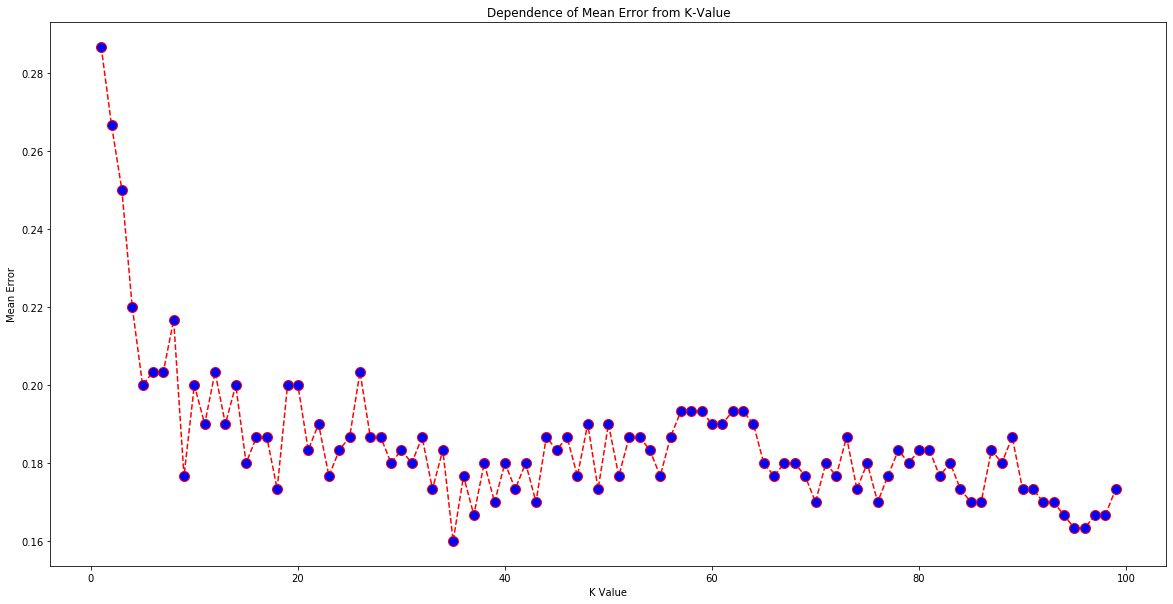

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 100), error,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Dependence of Mean Error from K-Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

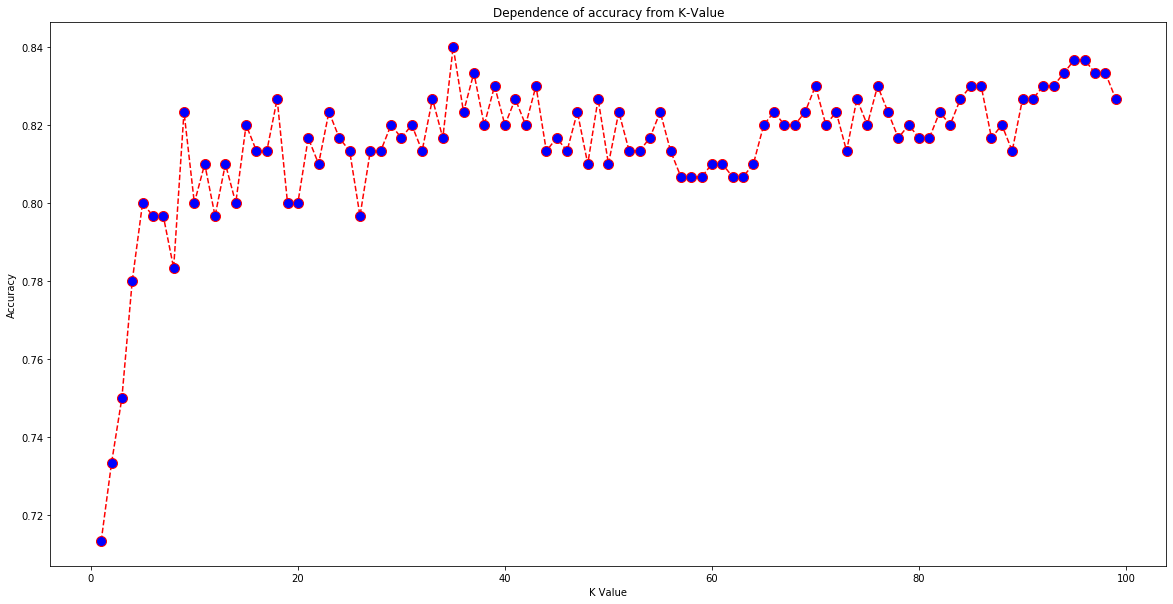

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 100), accuracy,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Dependence of accuracy from K-Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [21]:
print("Optimal k-number of nearest neighbours is",optimal_neighbor_number)

Optimal k-number of nearest neighbours is 35


In [22]:
knn = KNeighborsClassifier(n_neighbors=optimal_neighbor_number,metric='manhattan')
knn.fit(X_train, y_train)
cv_score = cross_val_score(knn, X_train, y_train, cv = 5, scoring='accuracy')

In [23]:
pred_i = knn.predict(X_valid)
acc=accuracy_score(y_valid, pred_i)
print("Validation accuracy:", acc)

Validation accuracy: 0.84


In [24]:
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data, feature_names=columns)

In [25]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png("Results/tree.tif")

In [26]:
f = Image.open("Results/tree.tif").show()

In [27]:
test_data=test_data.drop(['Class'], axis=1)

In [28]:
y_predict_knn = knn.predict(X_test)
y_pred_test_lin = lin.predict(X_test)
y_pred_test_rbf=rbf.predict(X_test)
y_predict_test_dtc = dtc.predict(X_test)

for i in range(0,len(y_predict_knn)):
    test_data.loc[i,'KNN Class']=y_predict_knn[i]
    test_data.loc[i,'SVM(Linear) Class']=y_pred_test_lin[i]
    test_data.loc[i,'SVM(rbf) Class']=y_pred_test_rbf[i]
    test_data.loc[i,'Decision Tree Class']=y_predict_test_dtc[i]
    


In [29]:
test_data.head(50)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,KNN Class,SVM(Linear) Class,SVM(rbf) Class,Decision Tree Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,10.776347,False,True,False,True
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.640000,True,True,True,True
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.840000,True,True,True,True
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.130000,False,False,False,False
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,10.776347,False,False,False,False
5,-252.81,8.73,2,0.32,0.32,-7.20,5.19,-20.85,-26.14,-22.14,17,-35.87,1.80,12.08,9.530000,False,False,False,True
6,-252.81,8.01,2,0.64,2.64,-6.42,3.63,-21.18,-26.14,-26.02,6,-46.87,0.74,11.45,10.010000,False,False,False,False
7,-276.81,8.67,2,0.74,0.36,-9.08,1.32,-22.71,-24.14,-20.88,14,-24.87,1.83,8.94,12.230000,True,True,True,True
8,-225.81,11.70,2,0.06,1.30,-7.90,2.73,-22.29,-26.14,-20.84,2,-9.87,1.86,10.26,11.320000,True,True,True,False
9,-216.81,9.54,2,0.61,-0.42,-10.12,7.02,-23.07,-26.14,-21.86,13,-3.87,1.74,10.72,10.776347,True,True,True,True


In [30]:
test_data.to_csv(result_file, sep=',')

In [31]:
results={"KNN":y_predict_knn,"SVM(Linear)":y_pred_test_lin, "SVM(rbf)":y_pred_test_rbf,"DT":y_predict_test_dtc}
df = pd.DataFrame(results,columns=results.keys())

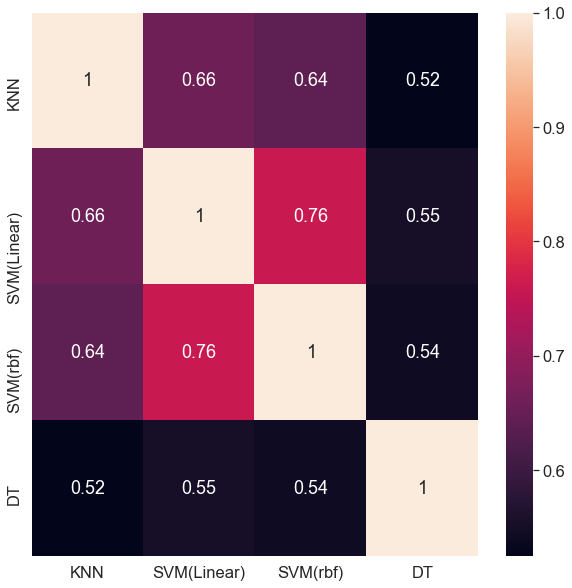

In [32]:
corrMatrix = df.corr()
plt.figure(figsize=(10,10))
sn.set(font_scale=1.5)

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [33]:
corrMatrix

,KNN,SVM(Linear),SVM(rbf),DT
KNN,1.000000,0.656984,0.641525,0.524517
SVM(Linear),0.656984,1.000000,0.759654,0.553304
SVM(rbf),0.641525,0.759654,1.000000,0.541794
DT,0.524517,0.553304,0.541794,1.000000
